In [29]:
import wntr
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [3]:
inp_file='/home/wahab901278/Downloads/Net3.inp'
wn=wntr.network.WaterNetworkModel(inp_file)

In [30]:
cmap=matplotlib.colormaps['viridis']
G=wn.to_graph()

In [7]:
betweenness_centrality=nx.betweenness_centrality(G,weight='length')

In [11]:
critical_pipes=[]
centrality_threshold=sorted(betweenness_centrality.values(),reverse=True)[int(0.1*len(betweenness_centrality))]
for pipe, centrality in betweenness_centrality.items():
    if centrality>centrality_threshold:
        critical_pipes.append(pipe)

In [12]:
critical_pipes

['184', '185', '205', '206', '207', '208', '209', '211', '237']

In [27]:
valve_layer=wntr.network.generate_valve_layer(wn,placement_type='strategic',n=2,seed=123)
G=wn.to_graph()
node_segments,link_segments,segment_size=wntr.metrics.valve_segments(G,valve_layer)

/home/wahab901278/anaconda3/lib/python3.11/site-packages/wntr/metrics/topographic.py:237: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valved_link_names.append(row[0])
/home/wahab901278/anaconda3/lib/python3.11/site-packages/wntr/metrics/topographic.py:274: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valved_node_name = link_valves.iloc[0][1]


<Axes: >

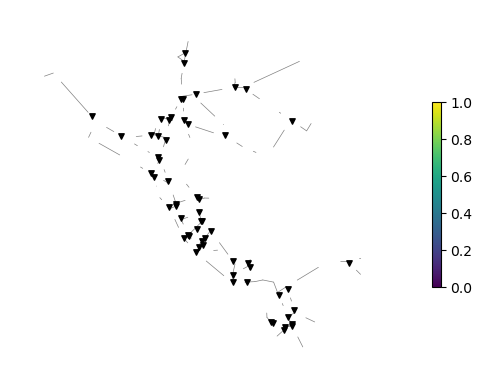

In [32]:
wntr.graphics.plot_valve_layer(wn,valve_layer,include_network=True)

In [35]:
# Seismic Retrofit

for junction_name in wn.junction_name_list:
    junction = wn.get_node(junction_name)
    junction.elevation=junction.elevation-0.5

In [36]:
sim=wntr.sim.WNTRSimulator(wn)
results=sim.run_sim()

In [43]:

for pipe_name in wn.pipe_name_list:
    pipe=wn.get_link(pipe_name)
    if pipe.status==1:
        wn.add_control(f'maintenance of {pipe_name}',wntr.network.controls.ControlAction(pipe,'status',0))

ValueError: The name provided for the control is already used. Please either remove the control with that name first or use a different name for this control.

In [39]:
pipe

<Pipe '333' from '601' to '61', length=0.3048, diameter=0.762, roughness=140.0, minor_loss=0.0, check_valve=False, status=Open>